# Phase 4: Clustering Analysis

**Project**: Steel Plates Fault Detection  
**Purpose**: Group similar fault patterns using unsupervised learning  
**Date**: December 2024

---

## Overview

Clustering is an **unsupervised learning** technique that groups similar data points together.

**Algorithms covered:**
1. **K-Means**: Fast, spherical clusters
2. **DBSCAN**: Density-based, finds arbitrary shapes
3. **Hierarchical**: Tree-based, shows relationships

---

## Table of Contents

1. [Setup and Data Loading](#1-setup-and-data-loading)
2. [K-Means Clustering](#2-k-means-clustering)
3. [DBSCAN Clustering](#3-dbscan-clustering)
4. [Hierarchical Clustering](#4-hierarchical-clustering)
5. [Comparison](#5-comparison)
6. [Summary](#6-summary)

---
## 1. Setup and Data Loading

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Clustering algorithms
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage

# For visualization
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style('whitegrid')

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


In [2]:
# Load and prepare data
df = pd.read_csv('../data/raw/steel_plates_fault.csv')

# Get feature columns (exclude target)
feature_cols = [col for col in df.columns if col != 'Class']
X = df[feature_cols].values

# Scale features (important for clustering!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"✓ Data loaded: {X_scaled.shape[0]} samples, {X_scaled.shape[1]} features")

# Reduce to 2D for visualization using PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)
print(f"✓ PCA applied for visualization (2D)")
print(f"   Variance explained: {pca.explained_variance_ratio_.sum()*100:.1f}%")

✓ Data loaded: 1941 samples, 27 features
✓ PCA applied for visualization (2D)
   Variance explained: 43.4%


---
## 2. K-Means Clustering

### How K-Means Works:

1. Choose K (number of clusters)
2. Initialize K random centroids
3. Assign each point to nearest centroid
4. Update centroids to mean of assigned points
5. Repeat steps 3-4 until convergence

**Pros:** Fast, simple, works well for spherical clusters  
**Cons:** Must specify K, sensitive to initialization

🔍 Finding optimal K...

   K=2: Inertia=40517, Silhouette=0.3032
   K=3: Inertia=35992, Silhouette=0.1911
   K=4: Inertia=33031, Silhouette=0.1943
   K=5: Inertia=30969, Silhouette=0.1956
   K=6: Inertia=27073, Silhouette=0.1972
   K=7: Inertia=25546, Silhouette=0.1969
   K=8: Inertia=23885, Silhouette=0.2060
   K=9: Inertia=22597, Silhouette=0.2030
   K=10: Inertia=21489, Silhouette=0.2075


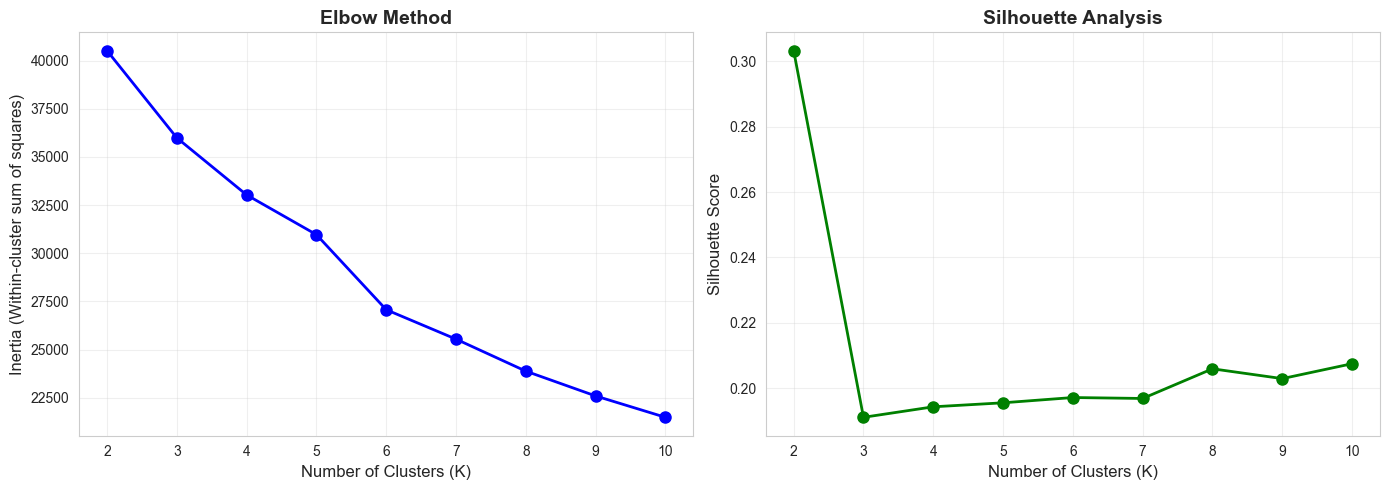


📊 Optimal K based on Silhouette Score: 2


In [3]:
# Find optimal K using Elbow Method and Silhouette Score
print("🔍 Finding optimal K...\n")

K_range = range(2, 11)
inertias = []
silhouettes = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, kmeans.labels_))
    print(f"   K={k}: Inertia={kmeans.inertia_:.0f}, Silhouette={silhouettes[-1]:.4f}")

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow plot
axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[0].set_ylabel('Inertia (Within-cluster sum of squares)', fontsize=12)
axes[0].set_title('Elbow Method', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Silhouette plot
axes[1].plot(K_range, silhouettes, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Analysis', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Best K based on silhouette
best_k = K_range[np.argmax(silhouettes)]
print(f"\n📊 Optimal K based on Silhouette Score: {best_k}")

In [4]:
# Apply K-Means with optimal K
k = 7  # Using 7 clusters (same as number of fault types)

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

print(f"✓ K-Means completed with K={k}")
print(f"\n📊 Cluster sizes:")
for i in range(k):
    count = (kmeans_labels == i).sum()
    print(f"   Cluster {i}: {count} samples ({count/len(kmeans_labels)*100:.1f}%)")

# Evaluate
sil_score = silhouette_score(X_scaled, kmeans_labels)
ch_score = calinski_harabasz_score(X_scaled, kmeans_labels)
print(f"\n📈 Evaluation Metrics:")
print(f"   Silhouette Score: {sil_score:.4f} (higher is better, max=1)")
print(f"   Calinski-Harabasz: {ch_score:.2f} (higher is better)")

✓ K-Means completed with K=7

📊 Cluster sizes:
   Cluster 0: 56 samples (2.9%)
   Cluster 1: 431 samples (22.2%)
   Cluster 2: 339 samples (17.5%)
   Cluster 3: 297 samples (15.3%)
   Cluster 4: 326 samples (16.8%)
   Cluster 5: 491 samples (25.3%)
   Cluster 6: 1 samples (0.1%)

📈 Evaluation Metrics:
   Silhouette Score: 0.1969 (higher is better, max=1)
   Calinski-Harabasz: 338.93 (higher is better)


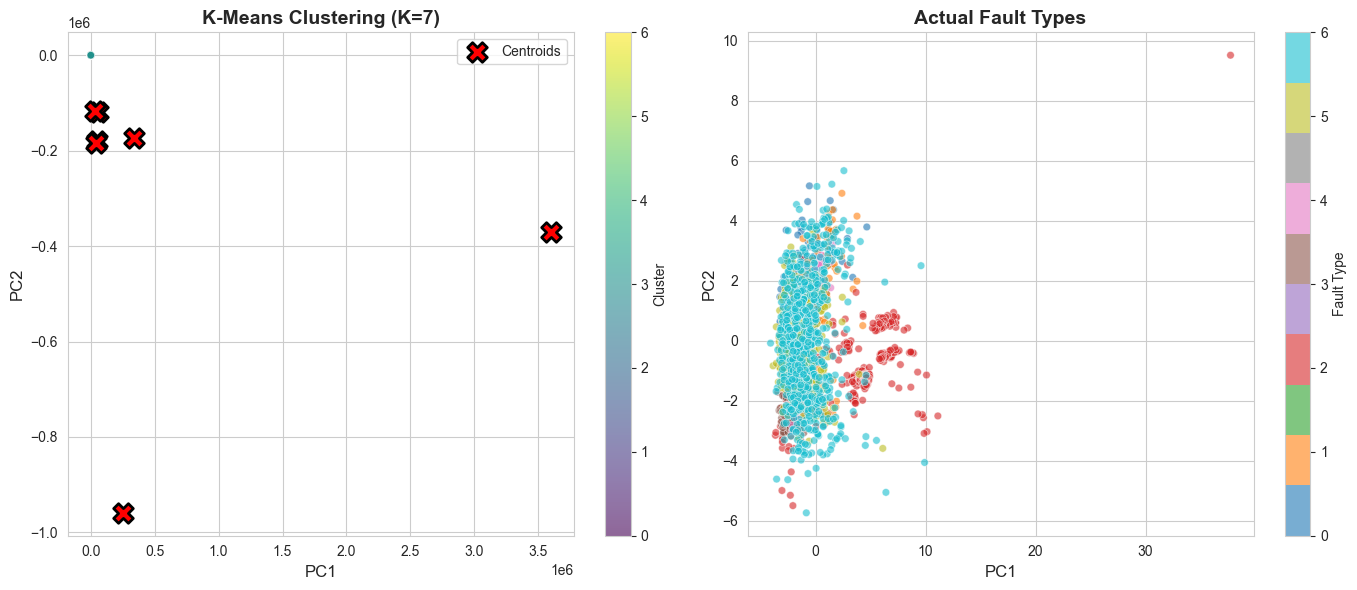

💡 Compare: Do clusters match actual fault types?


In [5]:
# Visualize K-Means clusters
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Cluster visualization
scatter = axes[0].scatter(X_2d[:, 0], X_2d[:, 1], c=kmeans_labels, cmap='viridis', 
                          alpha=0.6, s=30, edgecolors='white', linewidth=0.5)
axes[0].scatter(pca.transform(scaler.inverse_transform(kmeans.cluster_centers_))[:, 0],
               pca.transform(scaler.inverse_transform(kmeans.cluster_centers_))[:, 1],
               c='red', marker='X', s=200, edgecolors='black', linewidth=2, label='Centroids')
axes[0].set_xlabel('PC1', fontsize=12)
axes[0].set_ylabel('PC2', fontsize=12)
axes[0].set_title('K-Means Clustering (K=7)', fontsize=14, fontweight='bold')
axes[0].legend()
plt.colorbar(scatter, ax=axes[0], label='Cluster')

# Compare with actual classes
actual_labels = pd.factorize(df['Class'])[0]
scatter2 = axes[1].scatter(X_2d[:, 0], X_2d[:, 1], c=actual_labels, cmap='tab10', 
                           alpha=0.6, s=30, edgecolors='white', linewidth=0.5)
axes[1].set_xlabel('PC1', fontsize=12)
axes[1].set_ylabel('PC2', fontsize=12)
axes[1].set_title('Actual Fault Types', fontsize=14, fontweight='bold')
plt.colorbar(scatter2, ax=axes[1], label='Fault Type')

plt.tight_layout()
plt.show()

print("💡 Compare: Do clusters match actual fault types?")

---
## 3. DBSCAN Clustering

### How DBSCAN Works:

**D**ensity-**B**ased **S**patial **C**lustering of **A**pplications with **N**oise

1. For each point, find neighbors within radius ε (eps)
2. If point has ≥ min_samples neighbors → core point
3. Connect core points that are neighbors
4. Points not reachable from any core point → noise

**Pros:** Finds arbitrary shapes, detects outliers, no need to specify K  
**Cons:** Sensitive to eps and min_samples parameters

In [6]:
# Apply DBSCAN
# eps: neighborhood radius
# min_samples: minimum points to form a cluster

print("🔍 Applying DBSCAN...\n")

# Try different eps values
eps_values = [0.5, 1.0, 1.5, 2.0, 2.5]
results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = (labels == -1).sum()
    
    if n_clusters > 1:
        sil = silhouette_score(X_scaled[labels != -1], labels[labels != -1])
    else:
        sil = -1
    
    results.append({'eps': eps, 'clusters': n_clusters, 'noise': n_noise, 'silhouette': sil})
    print(f"   eps={eps}: {n_clusters} clusters, {n_noise} noise points, silhouette={sil:.4f}")

# Select best eps
results_df = pd.DataFrame(results)
print("\n📊 DBSCAN Results:")
print(results_df.to_string(index=False))

🔍 Applying DBSCAN...

   eps=0.5: 8 clusters, 1743 noise points, silhouette=0.4676
   eps=1.0: 15 clusters, 1585 noise points, silhouette=0.4817
   eps=1.5: 36 clusters, 1054 noise points, silhouette=0.3400
   eps=2.0: 26 clusters, 503 noise points, silhouette=0.0724
   eps=2.5: 13 clusters, 207 noise points, silhouette=0.1064

📊 DBSCAN Results:
 eps  clusters  noise  silhouette
 0.5         8   1743    0.467597
 1.0        15   1585    0.481727
 1.5        36   1054    0.339996
 2.0        26    503    0.072421
 2.5        13    207    0.106372


In [7]:
# Apply DBSCAN with chosen parameters
eps = 2.0
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(X_scaled)

n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = (dbscan_labels == -1).sum()

print(f"✓ DBSCAN completed (eps={eps}, min_samples={min_samples})")
print(f"\n📊 Results:")
print(f"   Clusters found: {n_clusters}")
print(f"   Noise points: {n_noise} ({n_noise/len(dbscan_labels)*100:.1f}%)")

print(f"\n📊 Cluster sizes:")
for label in set(dbscan_labels):
    count = (dbscan_labels == label).sum()
    name = f"Cluster {label}" if label != -1 else "Noise"
    print(f"   {name}: {count} samples")

✓ DBSCAN completed (eps=2.0, min_samples=5)

📊 Results:
   Clusters found: 26
   Noise points: 503 (25.9%)

📊 Cluster sizes:
   Cluster 0: 515 samples
   Cluster 1: 23 samples
   Cluster 2: 414 samples
   Cluster 3: 9 samples
   Cluster 4: 8 samples
   Cluster 5: 13 samples
   Cluster 6: 17 samples
   Cluster 7: 23 samples
   Cluster 8: 40 samples
   Cluster 9: 65 samples
   Cluster 10: 173 samples
   Cluster 11: 13 samples
   Cluster 12: 5 samples
   Cluster 13: 11 samples
   Cluster 14: 9 samples
   Cluster 15: 5 samples
   Cluster 16: 9 samples
   Cluster 17: 13 samples
   Cluster 18: 9 samples
   Cluster 19: 10 samples
   Cluster 20: 18 samples
   Cluster 21: 10 samples
   Cluster 22: 5 samples
   Cluster 23: 9 samples
   Cluster 24: 7 samples
   Cluster 25: 5 samples
   Noise: 503 samples


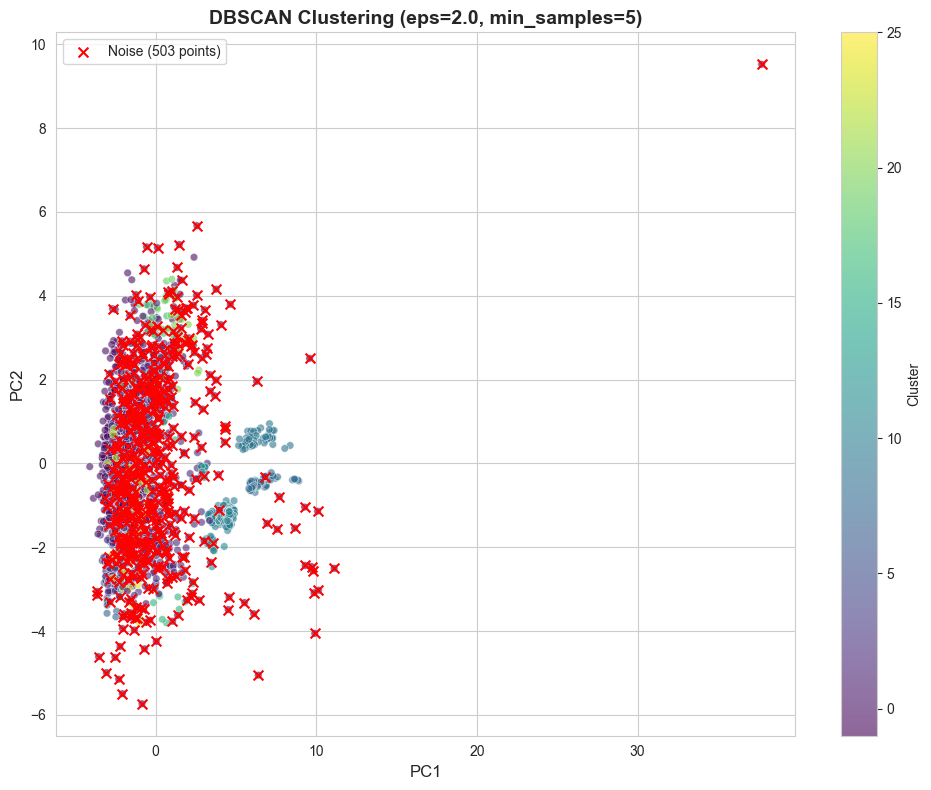

💡 Red X marks are noise points (potential anomalies)


In [8]:
# Visualize DBSCAN
plt.figure(figsize=(10, 8))

# Color noise points differently
colors = dbscan_labels.copy().astype(float)
colors[dbscan_labels == -1] = -1  # Noise

scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=colors, cmap='viridis', 
                      alpha=0.6, s=30, edgecolors='white', linewidth=0.5)

# Mark noise points
noise_mask = dbscan_labels == -1
plt.scatter(X_2d[noise_mask, 0], X_2d[noise_mask, 1], c='red', marker='x', 
            s=50, label=f'Noise ({noise_mask.sum()} points)')

plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})', fontsize=14, fontweight='bold')
plt.legend()
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()

print("💡 Red X marks are noise points (potential anomalies)")

---
## 4. Hierarchical Clustering

### How Hierarchical Clustering Works:

**Agglomerative (Bottom-up):**
1. Start with each point as its own cluster
2. Merge closest pair of clusters
3. Repeat until desired number of clusters

**Linkage methods:**
- **Single**: Minimum distance between clusters
- **Complete**: Maximum distance
- **Average**: Average distance
- **Ward**: Minimizes variance

**Pros:** Creates dendrogram showing relationships, no need to specify K upfront  
**Cons:** Computationally expensive for large datasets

🔍 Creating dendrogram...



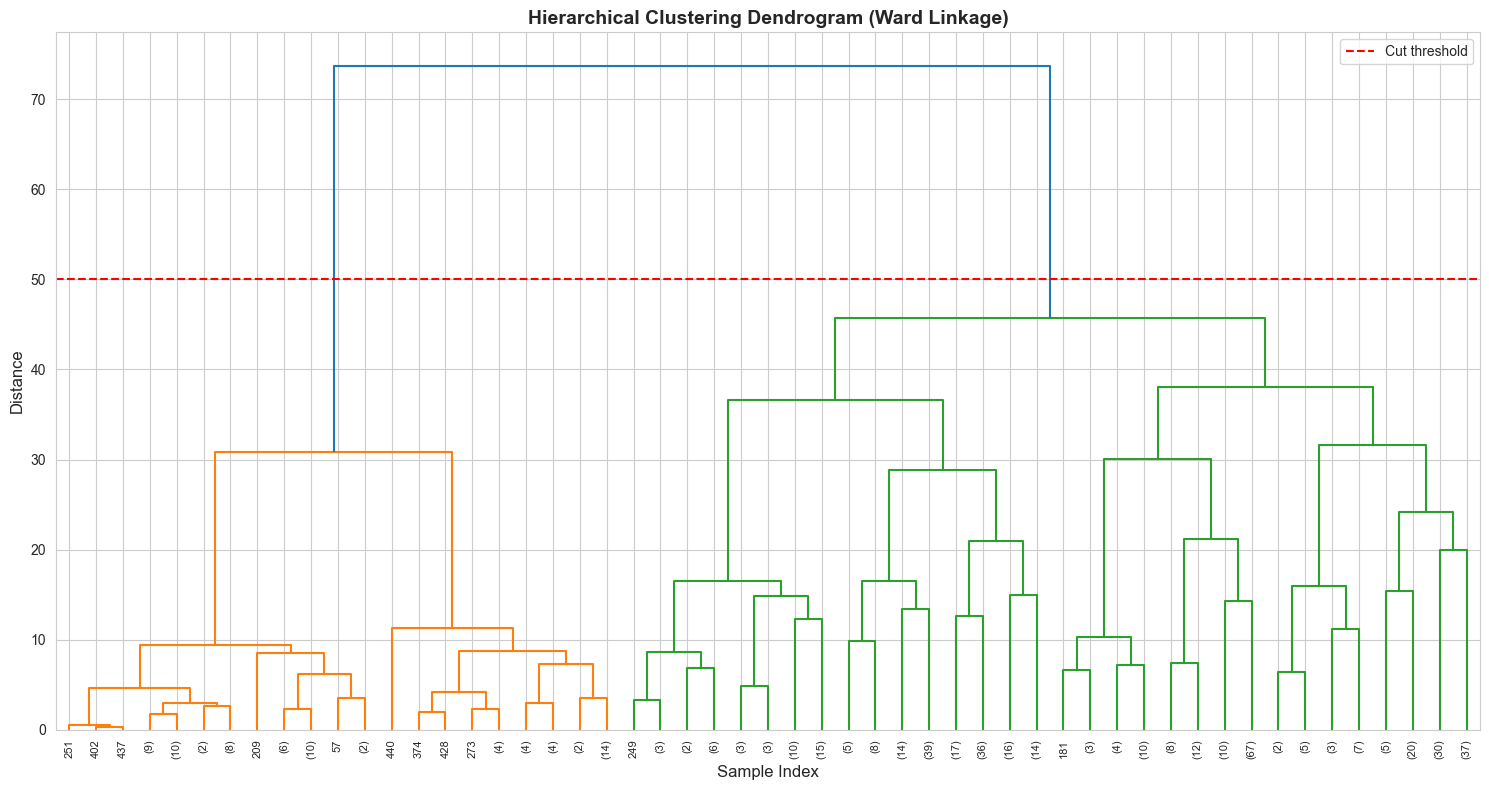

💡 Horizontal line shows where to cut for different numbers of clusters


In [9]:
# Create dendrogram
print("🔍 Creating dendrogram...\n")

# Use subset for visualization (dendrogram gets cluttered with too many points)
sample_size = min(500, len(X_scaled))
np.random.seed(42)
sample_idx = np.random.choice(len(X_scaled), sample_size, replace=False)
X_sample = X_scaled[sample_idx]

# Compute linkage matrix
linkage_matrix = linkage(X_sample, method='ward')

# Plot dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5, 
           leaf_rotation=90, leaf_font_size=8, 
           color_threshold=0.7*max(linkage_matrix[:,2]))
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)', fontsize=14, fontweight='bold')
plt.axhline(y=50, color='r', linestyle='--', label='Cut threshold')
plt.legend()
plt.tight_layout()
plt.show()

print("💡 Horizontal line shows where to cut for different numbers of clusters")

In [10]:
# Apply Agglomerative Clustering
n_clusters = 7

agg = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
agg_labels = agg.fit_predict(X_scaled)

print(f"✓ Hierarchical Clustering completed (n_clusters={n_clusters})")

# Evaluate
sil_score = silhouette_score(X_scaled, agg_labels)
ch_score = calinski_harabasz_score(X_scaled, agg_labels)

print(f"\n📊 Cluster sizes:")
for i in range(n_clusters):
    count = (agg_labels == i).sum()
    print(f"   Cluster {i}: {count} samples ({count/len(agg_labels)*100:.1f}%)")

print(f"\n📈 Evaluation Metrics:")
print(f"   Silhouette Score: {sil_score:.4f}")
print(f"   Calinski-Harabasz: {ch_score:.2f}")

✓ Hierarchical Clustering completed (n_clusters=7)

📊 Cluster sizes:
   Cluster 0: 532 samples (27.4%)
   Cluster 1: 606 samples (31.2%)
   Cluster 2: 203 samples (10.5%)
   Cluster 3: 130 samples (6.7%)
   Cluster 4: 439 samples (22.6%)
   Cluster 5: 1 samples (0.1%)
   Cluster 6: 30 samples (1.5%)

📈 Evaluation Metrics:
   Silhouette Score: 0.1848
   Calinski-Harabasz: 307.60


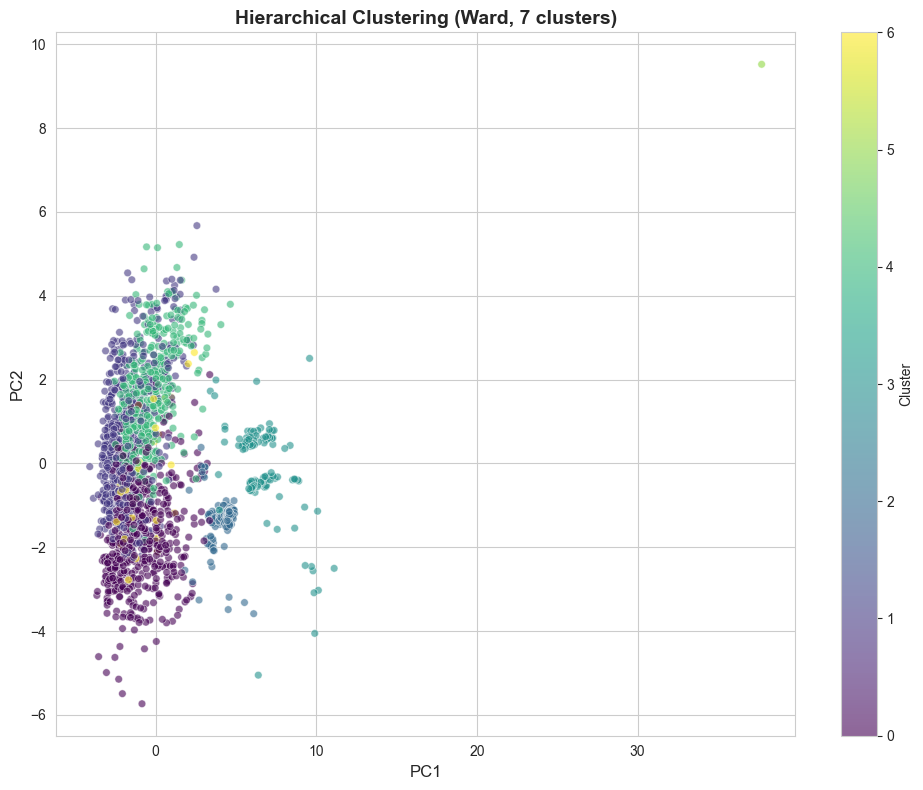

In [11]:
# Visualize Hierarchical Clustering
plt.figure(figsize=(10, 8))

scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=agg_labels, cmap='viridis', 
                      alpha=0.6, s=30, edgecolors='white', linewidth=0.5)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.title('Hierarchical Clustering (Ward, 7 clusters)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()

---
## 5. Comparison

In [12]:
# Compare all clustering methods
print("📊 CLUSTERING METHODS COMPARISON\n")
print("="*60)

# Calculate metrics for each method
results = {
    'K-Means': {
        'labels': kmeans_labels,
        'n_clusters': len(set(kmeans_labels)),
        'silhouette': silhouette_score(X_scaled, kmeans_labels),
        'calinski': calinski_harabasz_score(X_scaled, kmeans_labels)
    },
    'Hierarchical': {
        'labels': agg_labels,
        'n_clusters': len(set(agg_labels)),
        'silhouette': silhouette_score(X_scaled, agg_labels),
        'calinski': calinski_harabasz_score(X_scaled, agg_labels)
    }
}

# Add DBSCAN if it found more than 1 cluster
if n_clusters > 1:
    non_noise = dbscan_labels != -1
    results['DBSCAN'] = {
        'labels': dbscan_labels,
        'n_clusters': len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0),
        'silhouette': silhouette_score(X_scaled[non_noise], dbscan_labels[non_noise]) if non_noise.sum() > 0 else -1,
        'calinski': calinski_harabasz_score(X_scaled[non_noise], dbscan_labels[non_noise]) if non_noise.sum() > 0 else 0
    }

# Display comparison
comparison_df = pd.DataFrame({
    'Method': list(results.keys()),
    'Clusters': [r['n_clusters'] for r in results.values()],
    'Silhouette': [r['silhouette'] for r in results.values()],
    'Calinski-Harabasz': [r['calinski'] for r in results.values()]
}).round(4)

print(comparison_df.to_string(index=False))

# Best method
best_method = comparison_df.loc[comparison_df['Silhouette'].idxmax(), 'Method']
print(f"\n🏆 Best method (by Silhouette): {best_method}")

📊 CLUSTERING METHODS COMPARISON

      Method  Clusters  Silhouette  Calinski-Harabasz
     K-Means         7      0.1969           338.9294
Hierarchical         7      0.1848           307.6042
      DBSCAN        26      0.0724            89.4727

🏆 Best method (by Silhouette): K-Means


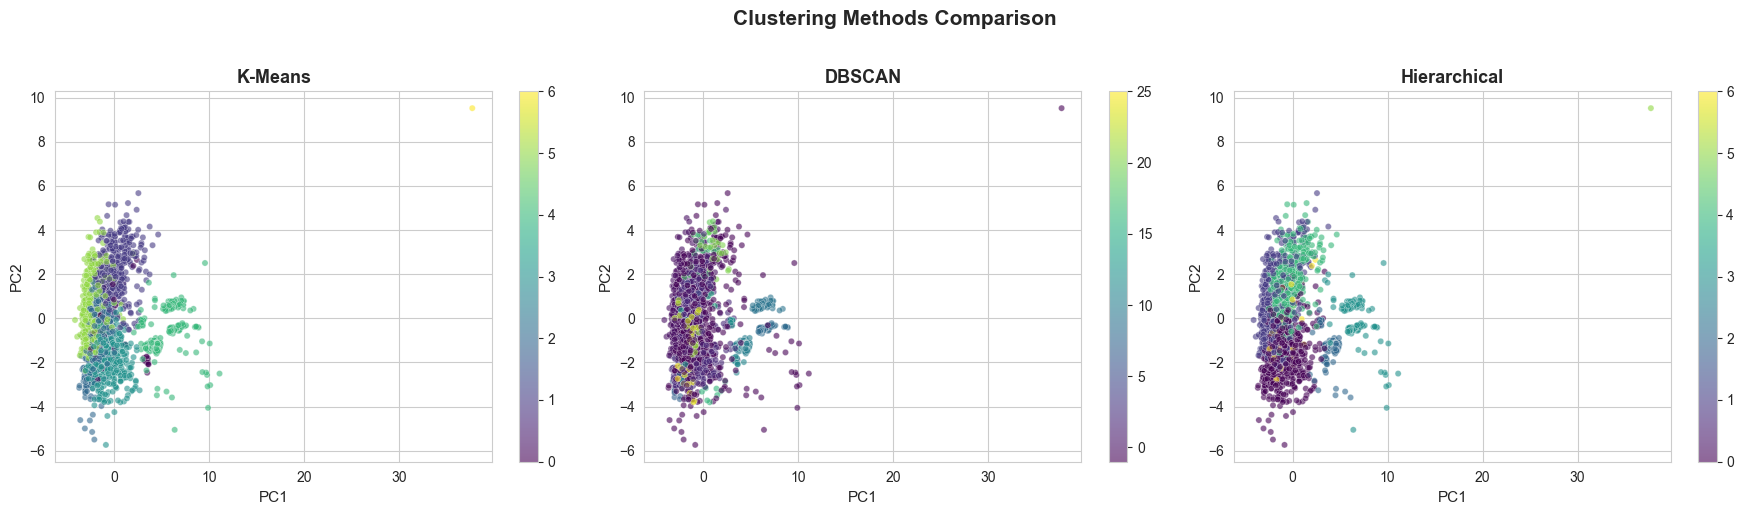

In [13]:
# Visualize all methods side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

methods = [('K-Means', kmeans_labels), ('DBSCAN', dbscan_labels), ('Hierarchical', agg_labels)]

for idx, (name, labels) in enumerate(methods):
    scatter = axes[idx].scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis', 
                                alpha=0.6, s=20, edgecolors='white', linewidth=0.3)
    axes[idx].set_xlabel('PC1', fontsize=11)
    axes[idx].set_ylabel('PC2', fontsize=11)
    axes[idx].set_title(name, fontsize=13, fontweight='bold')
    plt.colorbar(scatter, ax=axes[idx])

plt.suptitle('Clustering Methods Comparison', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---
## 6. Summary

### 🎯 Key Findings

| Method | Clusters | Best For |
|--------|----------|----------|
| **K-Means** | Fixed K | Spherical, balanced clusters |
| **DBSCAN** | Auto | Arbitrary shapes, outlier detection |
| **Hierarchical** | Flexible | Understanding cluster relationships |

### 📊 Evaluation Metrics

- **Silhouette Score**: Measures cluster cohesion and separation (-1 to 1)
- **Calinski-Harabasz**: Ratio of between-cluster to within-cluster variance

### 💡 Recommendations

1. Use **K-Means** for quick analysis with known K
2. Use **DBSCAN** when outlier detection is important
3. Use **Hierarchical** to explore cluster structure

---

✅ **Phase 4 (Clustering) Complete!**